 # World University Rankings

**Nomes:** Daniel, Davi, Eduardo, João

**Matriculas:** 2018054664, 2018054400 , 2018126657, 2018088097

 ## Introdução

Neste trabalho iremos analisar uma base de dados sobre o ranking mundial de universidades disponibilizado pela Times Data. Essa base de dados contém tanto as notas de cada categoria usada para o cálculo da nota final da universidade, que varia de 0 a 100, quanto outros indicadores que não dependem da Times Data como, por exemplo, a proporção de estudantes do sexo feminino, número de estudantes totais e a proporção de estudantes internacionais.

A motivação do trabalho veio do fato de ser interessante o estudo de como diversos fatores podem alterar o desempenho geral de faculdades ao redor do mundo. Com esses dados, tentaremos encontrar relações entre os atributos e a pontuação final para entender quais aspectos poderiam ser melhorados pelas universidades.



#### Perguntas

1 - A proporção de estudantes internacionais impacta no ranking da universidade?  

2 - Qual o impacto de cada atributo suplementar na nota final da universidade? 
    
3 - Podemos prever a posição/pontuação média das universidades de um país dado o seu investimento em educação?

4 - Detectar se a proporção entre homens e mulheres teve uma tendencia geral ao longo do tempo

4.1 - Universidades com pelo menos 50% de mulheres tem mais pontuação do que as que tem menos do que 50% de mulheres?

# Metodologia

Nesta seção iremos mostrar detalhes de nossa base de dados.


## Times Data
**Descrição:** Nesse dataset provido pela Times Data, existe um conjunto de dados como o ranking mundial de universidades ordenado, nome dessas universidades, país em que se reside essas universidades, a sua pontuação em ensino, pontuação em perspectiva internacional, pontuação para pesquisa, pontuação em citações, pontuação para receita da indústria, a média das pontuações anteriores sendo isso a sua pontuação total e o número total de estudantes em cada uma dessas universidades.
<p>Dentre essas, existem algumas que já são usadas no cálculo da nota final da universidade. As explicações de cada uma e o cálculo final da nota pode ser visto no  <a href="https://www.timeshighereducation.com/news/ranking-methodology-2016"> site oficial da Times Data</a>.</p>

**Fonte:** [timesData - World University Ranks - Kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings?select=timesData.csv)


## Education Expenditure Supplementary Data
**Descrição:** Conjunto de dados contendo nome do país, tipos de instutuições, tipo de despesa (publica ou privada), e os gastos em porcentagem do PIB de cada país com aquele tipo de instuição por país entre os anos de 2007 e 2016.

**Fonte:** [NCES - National Center for Education Statistics](https://nces.ed.gov/programs/digest/)

## PIB Países
**Descrição:** Dados brutos de PIB de todos países do mundo.

**Fonte:** [pibPaises - The World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2016&name_desc=false&start=2005)


## Quais métodos e modelos foram utilizados.

<p>Para realizar as análises, primeiramente, foi realizado o tratamento dos dados por meio de funções que alteram e corrigem vários aspectos na forma que os dados foram apresentados originalmente.</p>
<p> Para realizar as análises em si, foram utilizados métodos aprendidos em aula como Teste A/B com Permutação, Regressões Lineares e Múltiplas com Z-Normalização dos dados. Além disso, os sites indicados como bibliografia na página da disciplina também foram consultados: <a href="https://inferentialthinking.com/chapters/intro">Inferential Thinking</a> e <a href="https://www.textbook.ds100.org/intro.html">Principles and Techniques of Data Science</a>.

## Resultados

(Falta exploração inicial?)


In [1]:
from scipy import stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

### TimesData

Primeiramente, importamos e analisamos os dados como estão sendo mostrados.

In [2]:
timesData = pd.read_csv("timesData.csv")

In [3]:
timesData.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [4]:
timesData.head(3)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


### Tipos de dados

Separamos os tipos de dados para facilitar a exploração dos dados futuramente.

$$ Numeral $$

Discreto | Continuo
:--------- | -------:
world_rank | teaching
num_students |international
year |research
  |citations
  |income
  |total_score
  |student_staff_ratio
  |international_students
  |female_male_ratio



$$ Categorico $$

Categorico | Ordinal
:--------- | -------:
university_name	 | 
country	 | 



Verificamos a quantidade de valores nulos na tabela.

In [5]:
timesData.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

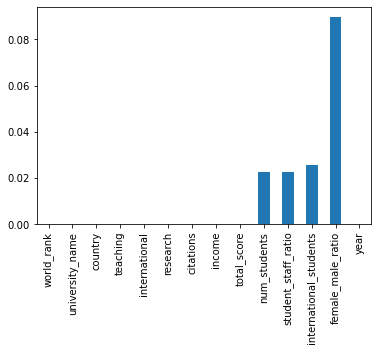

In [6]:
timesDataNaN = timesData.isna().sum()
timesDataNaN = timesDataNaN/len(timesData)
timesDataNaN.plot(kind='bar')

### Tratamento de Dados da timesData

In [7]:
def defineFemaleRatio(df):
    """
    Altera a coluna female_male_ratio para que mostre apenas a porcentagem de mulheres na universidade.
    Além disso, remove valores iguais a "-" e os salva como NaN.
    Dessa forma, fica mais fácil de analisar essa coluna. Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(df))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,12])):
            if dfNovo.at[i,'female_male_ratio'] == '-':
                dfNovo.at[i,'female_male_ratio'] = np.nan
            else:
                dfNovo.at[i,'female_male_ratio'] = int(dfNovo.at[i,'female_male_ratio'].strip()[0:2])
    return dfNovo
            
def retiraPorcentagem(df):
    """
    Retira o símbolo de % da coluna 'international_students' e retorna um novo dataset sem modificar o original.
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,11])):
            valorNovo = dfNovo.at[i,'international_students']
            if '%' in valorNovo:
                valorNovo = valorNovo[:-1]
            if valorNovo.strip() not in ['']:
                dfNovo.at[i,'international_students'] = int(valorNovo)
    return dfNovo

def retiraVirgulaNumAlunos(df):
    """
    df: Um dataframe
    Retira a vírgula que separa os números da coluna num_students e os converte para inteiro para que
    possam ser usados como dados em plots. Não altera o dataframe passado. Retorna um novo dataframe
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if(not pd.isna(df.at[i,'num_students'])):
            dfNovo.at[i,'num_students'] = int(dfNovo.at[i,'num_students'].replace(',','',1))
    return dfNovo

def isFloat(value):
    """
    Retorna True se é possível converter o valor para float e False caso não seja possível
    """
    try:
        float(value)
        return True
    except ValueError:
        return False

def calculaTotalScore(linha):
    """
    linha: Um objeto Series contendo as seguintes colunas:
        teaching, international, research, citations, income e year
        
    Retorna o total_score (arredondado com 1 casa decimal) de uma universidade de acordo
    com as regras da Times. 
    Retorna -1 caso o valor em 'year' não esteja da faixa de (2011-2016) ou caso pelo menos uma das cinco
    categorias não tenha um valor float
    
    O peso de cada categoria varia por ano:
    
        2011:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 32.5%
            peso_research: 30%
            peso_international: 5%
            
        2012,2013,2014,2015,2016:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 30%
            peso_research: 30%
            peso_international: 7.5%
         
        total_score = {(teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research)}/(100)
    
    """
    peso_teaching = 30
    peso_income = 2.5
    peso_citations = 0
    peso_research = 30
    peso_international = 0
    teaching = 0
    income = 0
    citations = 0
    research = 0
    international = 0
    
    if(isFloat(linha['teaching'])):
        teaching = float(linha['teaching'])
    else:
        return -1.0
    
    if(isFloat(linha['income'])):
        income = float(linha['income'])
    else:
        return -1.0
    
    if(isFloat(linha['citations'])):
        citations = float(linha['citations'])
    else:
        return -1.0
    
    if(isFloat(linha['research'])):
        research = float(linha['research'])
    else:
        return -1.0
    
    if(isFloat(linha['international'])):
        international = float(linha['international'])
    else:
        return -1.0
    
    if int(linha['year']) == 2011:
        peso_citations = 32.5
        peso_international = 5
    elif int(linha['year']) in [2012,2013,2014,2015,2016]:
        peso_citations = 30
        peso_international = 7.5
    else:
        return -1.0
    
    total_score = ((teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research))/(100)
    return float(round(total_score,1))

def completaTotalScores(df):
    """
    df: Um dataframe
    Calcula a nota final de cada universidade se for possível. Caso não seja possível, é feita a média da linha imediata
    mente acima e a linha imediatamente abaixo.
    Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        novaNota = 0
        novaNota = calculaTotalScore(dfNovo.iloc[i])
        dfNovo.at[i,'total_score'] = novaNota
    for i in range(len(dfNovo)): #Onde total score é -1, foi feita uma média cm seu anterior e posterior#
        if dfNovo.at[i,'total_score'] == -1:
            notaMaior = float(dfNovo.at[i - 1,'total_score']) 
            notaMenor = float(dfNovo.at[i + 1,'total_score'])
            novaNota = (notaMaior + notaMenor)/2
            dfNovo.at[i,'total_score'] = novaNota
    return dfNovo

def arrumaNomePaises(df):
    """
    Arruma o nome de células que estão com:
    'Unisted States of America' para 'United States of America'
    'Unted Kingdom' para 'United Kingdom'
    """
    dfNovo = df.copy()

    #Index de quem tem o nome 'Unisted States of America'
    idxEUA = dfNovo.index[dfNovo['country'] == 'Unisted States of America']
    for i in range(len(idxEUA)):
        dfNovo.at[idxEUA[i],'country'] = 'United States of America'
    
    #Index de quem tem o nome 'Unted Kingdom'
    idxUK = dfNovo.index[dfNovo['country'] == 'Unted Kingdom']
    for i in range(len(idxUK)):
        dfNovo.at[idxUK[i],'country'] = 'United Kingdom'
    return dfNovo

def arrumaNomePaises(df):
    """
    Arruma o nome de células que estão com:
    'Unisted States of America' para 'United States of America'
    'Unted Kingdom' para 'United Kingdom'
    """
    dfNovo = df.copy()

    #Index de quem tem o nome 'Unisted States of America'
    idxEUA = dfNovo.index[dfNovo['country'] == 'Unisted States of America']
    for i in range(len(idxEUA)):
        dfNovo.at[idxEUA[i],'country'] = 'United States of America'
    
    #Index de quem tem o nome 'Unted Kingdom'
    idxUK = dfNovo.index[dfNovo['country'] == 'Unted Kingdom']
    for i in range(len(idxUK)):
        dfNovo.at[idxUK[i],'country'] = 'United Kingdom'
    return dfNovo

def trataDadosTimes(df):
    """
    df: Um dataframe, de preferência, o dataset da times original.
    Trata os dados do dataset de acordo com todas as regras existentes que devem ser aplicadas até agora.
    Retorna um novo dataframe sem alterar o original.
    """
    dfNovo = completaTotalScores(df)
    dfNovo = retiraPorcentagem(dfNovo)
    dfNovo = retiraVirgulaNumAlunos(dfNovo)
    dfNovo = defineFemaleRatio(dfNovo)
    dfNovo = arrumaNomePaises(dfNovo)
    return dfNovo

In [8]:
#Tratando os dados da times
timesCompleto = trataDadosTimes(timesData)

In [9]:
timesCompleto.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [10]:
timesCompleto.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243,6.9,27,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.5,11074,9.0,33,37,2011


### PibPaises

Foi usado o dataset de PIB de todos paises, pois tinhamos dados suplementares que continham a porcentagem do PIB de cada país gasto em educação.

Com o tratamento da timesData completo, podemos partir para analisar as proximas tabelas do nosso dataset.

In [11]:
pibPaises = pd.read_csv("pibPaises.csv")

In [12]:
pibPaises.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN


In [13]:
pibPaises1 = pibPaises.iloc[:,55:61]
NomesPaises = pibPaises.iloc[:,0]
pibPaises1 = pibPaises1/1000000000 #PIB em bilhões de dólares#
pibPaisesCompleto = pd.concat([NomesPaises, pibPaises1], axis=1)

In [14]:
pibPaisesCompleto.head(3)

,Country Name,2011,2012,2013,2014,2015,2016
0,Aruba,2.549721,2.534637,2.701676,2.765363,2.919553,2.965922
1,Afghanistan,17.804293,20.001599,20.561070,20.484885,19.907111,18.017749
2,Angola,111.789686,128.052854,136.709863,145.712200,116.193649,101.123851


### exData

Tabela que contêm porcentagem de gastos do PIB de cada país com educação.

In [15]:
exData = pd.read_csv("education_expenditure_supplementary_data.csv")

In [16]:
exTotal = exData.iloc[223:,np.r_ [0,11:17]]
exTotal.reset_index(drop=True, inplace=True)
exTotal.head(3)

,country,2011,2012,2013,2014,2015,2016
0,Australia,5.8,5.6,5.6,5.7,6.0,5.8
1,Austria,5.7,4.9,5.0,4.9,4.9,4.9
2,Belgium,6.6,5.9,5.8,5.8,5.8,5.7


In [17]:
investimentoPIB = pibPaisesCompleto.merge(exTotal,
        how = "inner",
        left_on = "Country Name", right_on = "country")
investimentoPIB = investimentoPIB.drop_duplicates(subset=['Country Name'], keep='last')
investimentoPIB.reset_index(drop=True, inplace=True)
investimentoPIB.head(3)

,Country Name,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,country,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,Australia,1396.649906,1546.151784,1576.184467,1467.483705,1351.693985,1208.846994,Australia,1.6,1.6,1.7,1.8,2.1,2.0
1,Austria,431.120310,409.425234,430.068713,441.996132,381.817566,395.568644,Austria,1.5,1.7,1.7,1.7,1.7,1.7
2,Belgium,522.645519,496.181260,521.642714,534.678076,462.149679,475.739589,Belgium,1.4,1.4,1.4,1.4,1.4,1.4


### Tratamento de Dados
Foi feito o tratamento de dados da junção das duas tabelas

In [18]:
investimentoPIB.rename(columns={"Country Name": "country"})
investimentoPIB.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Czech Republic', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Luxembourg', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'Poland', 'Portugal', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Turkey', 'United States'],
      dtype=object)

In [19]:
investimentoPIB['Result2012'] = investimentoPIB['2012_x']*investimentoPIB['2012_y']/100
investimentoPIB['Result2013'] = investimentoPIB['2013_x']*investimentoPIB['2013_y']/100
investimentoPIB['Result2014'] = investimentoPIB['2014_x']*investimentoPIB['2014_y']/100
investimentoPIB['Result2015'] = investimentoPIB['2015_x']*investimentoPIB['2015_y']/100
investimentoPIB['Result2016'] = investimentoPIB['2016_x']*investimentoPIB['2016_y']/100

In [20]:
investimentoEducacao = investimentoPIB.iloc[:,np.r_ [0,14:19]]
investimentoEducacao

,Country Name,Result2012,Result2013,Result2014,Result2015,Result2016
0,Australia,24.738429,26.795136,26.414707,28.385574,24.176940
1,Austria,6.960229,7.311168,7.513934,6.490899,6.724667
2,Belgium,6.946538,7.302998,7.485493,6.470096,6.660354
3,Brazil,22.186698,22.255262,19.647949,NaN,NaN
4,Canada,0.000000,0.000000,46.891863,37.347109,35.149594
5,Switzerland,8.016523,8.262050,9.219373,8.837820,8.727020
6,Chile,6.678058,6.681224,6.252999,4.878382,6.261003
7,Czech Republic,2.924008,2.751913,2.512306,1.880331,1.766449
8,Germany,42.328139,44.792921,50.490962,40.274828,41.609976
9,Denmark,0.000000,5.840935,6.000892,0.000000,0.000000


In [21]:
investimentoEducacao.describe()

,Result2012,Result2013,Result2014,Result2015,Result2016
count,35.000000,35.000000,35.000000,34.000000,34.000000
mean,26.031835,26.042688,27.881648,26.170497,25.786177
std,76.732106,73.596319,76.633479,80.633149,79.691845
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.120850,2.807218,3.028769,1.958361,1.892123
50%,6.946538,7.302998,7.513934,6.480497,6.692511
75%,17.799477,19.512500,19.689108,16.188748,14.951013
max,453.516206,436.406079,455.706256,473.842315,467.874013


In [22]:
investimentoEducacao.isna().sum()

Country Name    0
Result2012      0
Result2013      0
Result2014      0
Result2015      1
Result2016      1
dtype: int64

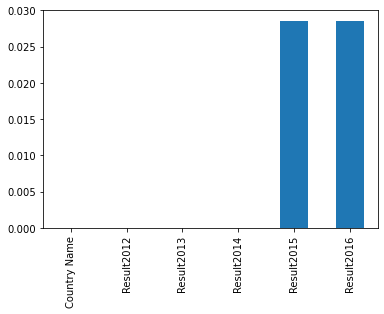

In [23]:
investimentoEducacaoNaN = investimentoEducacao.isna().sum()
investimentoEducacaoNaN = investimentoEducacaoNaN/len(investimentoEducacao)
investimentoEducacaoNaN.plot(kind='bar')

### Tipos de dados

Separamos os tipos de dados para facilitar a exploração dos dados futuramente.

$$ Numeral $$

Discreto | Continuo
:--------- | -------:
 | Result2011	a Result2016	

$$ Categorico $$

Categorico | Ordinal
:--------- | -------:
Country Name | 

### Comparando dados por regiões

In [24]:
#Latin America Countries
LTCountries = ["Argentina","Brazil","Chile","Colombia","Mexico"]
#North America Countries
NACountries = ["Canada","United States of America"]
#European Countries without Cyprus
EUCountries = ['Austria','Belarus','Belgium','Czech Republic','Denmark',
               'Estonia','Finland','France','Germany','Greece','Hungary',
               'Iceland','Italy','Latvia','Lithuania','Luxembourg',
               'Netherlands','Norway','Poland','Portugal','Republic of Ireland',
               'Romania','Russian Federation','Serbia','Slovakia',
               'Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom']
#African Countries without Egypt
AFCountries = ['Ghana','Kenya','Morocco','Nigeria','South Africa','Uganda']
#Middle Eastern Countries
MECountries = ['Egypt','Cyprus','Iran','Israel','Jordan','Lebanon',
               'Oman','Qatar','Saudi Arabia','Turkey','United Arab Emirates']
#Asian Countries
ASCountries = ['Bangladesh','China','Hong Kong','India','Indonesia','Japan',
               'Macau','Malaysia','Pakistan','Singapore','South Korea','Taiwan','Thailand']
#Oceania Countries
OCCountries = ['Australia','New Zealand']

In [25]:
LatinDataMF   = timesCompleto[timesCompleto['country'].isin(LTCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
LatinDataIS   = timesCompleto[timesCompleto['country'].isin(LTCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
NorAmeDataMF  = timesCompleto[timesCompleto['country'].isin(NACountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
NorAmeDataIS  = timesCompleto[timesCompleto['country'].isin(NACountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
EuropeDataMF  = timesCompleto[timesCompleto['country'].isin(EUCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
EuropeDataIS  = timesCompleto[timesCompleto['country'].isin(EUCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AfricanDataMF = timesCompleto[timesCompleto['country'].isin(AFCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AfricanDataIS = timesCompleto[timesCompleto['country'].isin(AFCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
MidEastDataMF = timesCompleto[timesCompleto['country'].isin(MECountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
MidEastDataIS = timesCompleto[timesCompleto['country'].isin(MECountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AsianDataMF   = timesCompleto[timesCompleto['country'].isin(ASCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AsianDataIS   = timesCompleto[timesCompleto['country'].isin(ASCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
OceaniaDataMF = timesCompleto[timesCompleto['country'].isin(OCCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
OceaniaDataIS = timesCompleto[timesCompleto['country'].isin(OCCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
LatinDataPF   = timesCompleto[timesCompleto['country'].isin(LTCountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
NorAmeDataPF  = timesCompleto[timesCompleto['country'].isin(NACountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
EuropeDataPF  = timesCompleto[timesCompleto['country'].isin(EUCountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
AfricanDataPF = timesCompleto[timesCompleto['country'].isin(AFCountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
MidEastDataPF = timesCompleto[timesCompleto['country'].isin(MECountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
AsianDataPF   = timesCompleto[timesCompleto['country'].isin(ASCountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()
OceaniaDataPF = timesCompleto[timesCompleto['country'].isin(OCCountries)][['total_score','year']].dropna().astype({'total_score':'float', 'year':'str'}).groupby(['year'], as_index=False).mean()

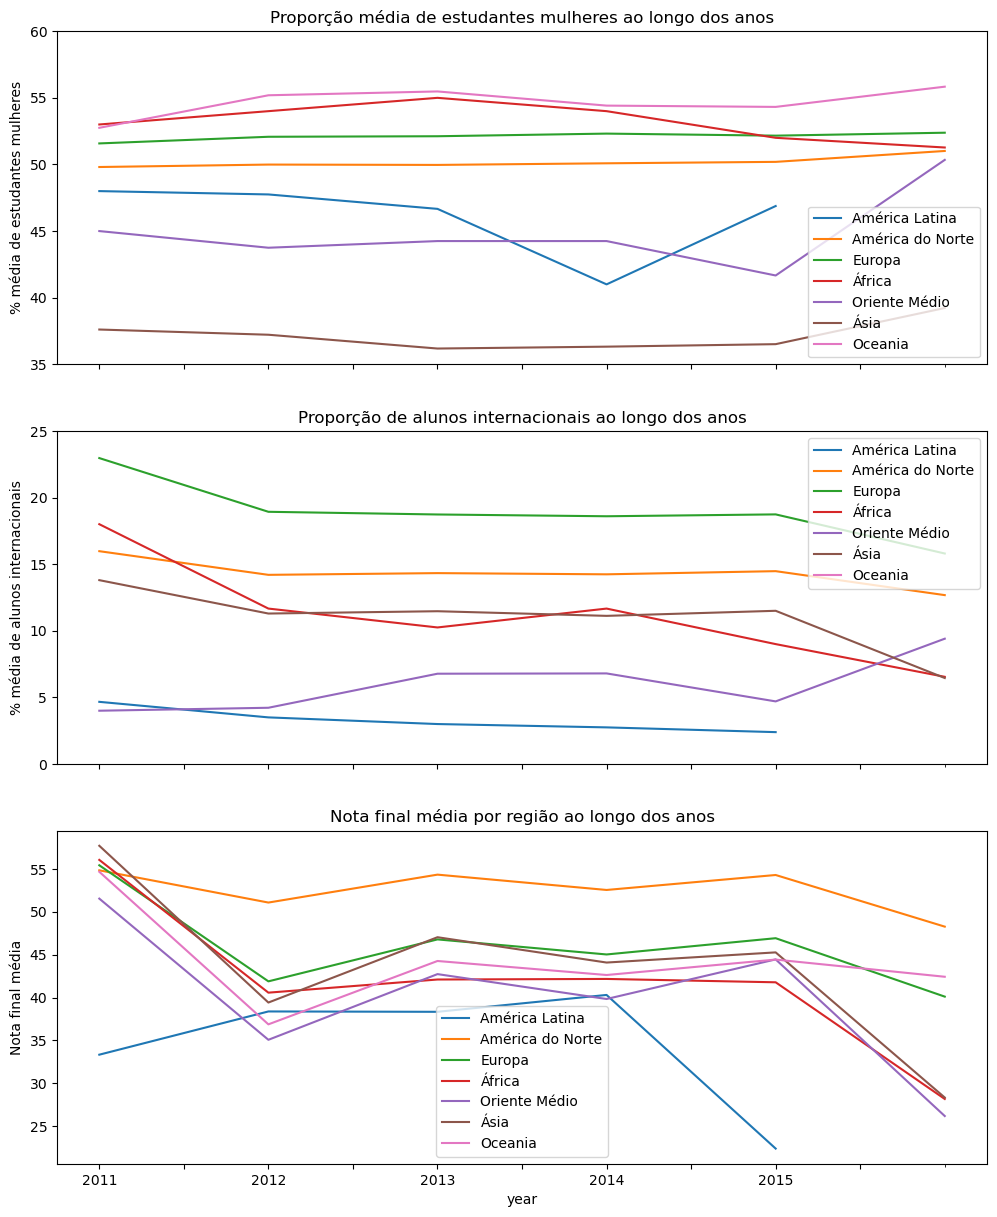

In [26]:
fig, axes = plt.subplots(figsize=(12,15), dpi=100, nrows=3 , sharex=True, sharey=False)
LatinDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
NorAmeDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
EuropeDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
AfricanDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
MidEastDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
AsianDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
OceaniaDataMF.plot(x='year', y='female_male_ratio', ylim=(35, 60), ax=axes[0])
axes[0].legend(['América Latina', 'América do Norte', 'Europa', 'África', 'Oriente Médio', 'Ásia', 'Oceania'])
axes[0].set_title("Proporção média de estudantes mulheres ao longo dos anos")
axes[0].set_ylabel("% média de estudantes mulheres")
LatinDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
NorAmeDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
EuropeDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
AfricanDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
MidEastDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
AsianDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
OceaniaDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
axes[1].set_title("Proporção de alunos internacionais ao longo dos anos")
axes[1].set_ylabel("% média de alunos internacionais")
axes[1].legend(['América Latina', 'América do Norte', 'Europa', 'África', 'Oriente Médio', 'Ásia', 'Oceania'])
LatinDataPF.plot(x='year', y='total_score', ax=axes[2])
NorAmeDataPF.plot(x='year', y='total_score', ax=axes[2])
EuropeDataPF.plot(x='year', y='total_score', ax=axes[2])
AfricanDataPF.plot(x='year', y='total_score', ax=axes[2])
MidEastDataPF.plot(x='year', y='total_score', ax=axes[2])
AsianDataPF.plot(x='year', y='total_score', ax=axes[2])
OceaniaDataPF.plot(x='year', y='total_score', ax=axes[2])
axes[2].set_title("Nota final média por região ao longo dos anos")
axes[2].set_ylabel("Nota final média")
axes[2].legend(['América Latina', 'América do Norte', 'Europa', 'África', 'Oriente Médio', 'Ásia', 'Oceania'])

## Analisando a proporção de estudantes internacionais

In [27]:
LTData = timesCompleto[timesCompleto['country'].isin(LTCountries)]
EUData = timesCompleto[timesCompleto['country'].isin(EUCountries)]
NAData = timesCompleto[timesCompleto['country'].isin(NACountries)]
AFData = timesCompleto[timesCompleto['country'].isin(AFCountries)]
MEData = timesCompleto[timesCompleto['country'].isin(MECountries)]
ASData = timesCompleto[timesCompleto['country'].isin(ASCountries)]
OCData = timesCompleto[timesCompleto['country'].isin(OCCountries)]

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação')

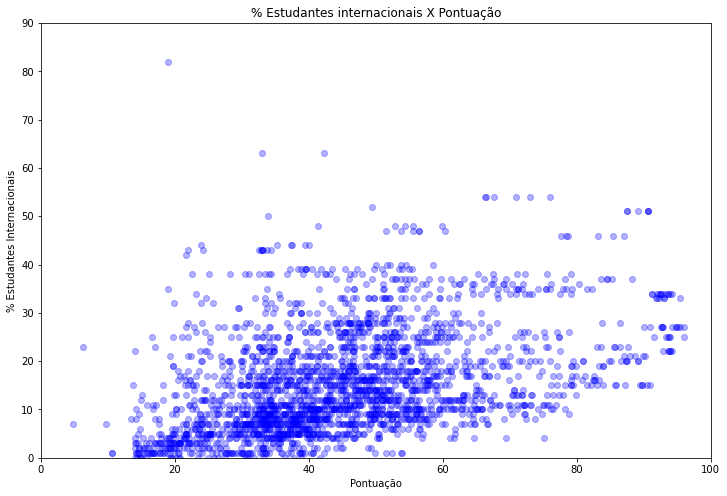

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(y=timesCompleto['international_students'],x=timesCompleto['total_score'],c='blue',alpha=0.3)
plt.xlim((0,100))
plt.ylim((0,90))
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação")

# P.1: A porcentagem de alunos internacionais influencia na pontuação final?
### Grupo A: Universidades com menos de 15% de alunos internacionais
### Grubo B: Universidades com pelo menos 15% alunos internacionais

Hipótese nula: Na população, a distribuição da pontuação final é a mesma para universidades com menos de 15% de alunos internacionais e para universidades com pelo menos 15% de alunos internacionais.

Hipótese alternativa: A pontuação final de universidades com pelo menos 15% de alunos internacionais é maior, na média, do que universidades com menos de 15% de alunos internacionais.

In [29]:
gp_A = timesCompleto[timesCompleto['international_students'] < 15]
gp_B = timesCompleto[timesCompleto['international_students'] >= 15]
mediaA = gp_A['total_score'].mean()
mediaB = gp_B['total_score'].mean()
print("Média das notas do grupo A: {}".format(mediaA))
print("Média das notas do grupo B: {}".format(mediaB))
print("Média do grupo A - média do grupo B: {}".format(mediaA - mediaB))
print("Número de universidades do grupo A: {}".format(gp_A.shape[0]))
print("Número de universidades do grupo B: {}".format(gp_B.shape[0]))

Média das notas do grupo A: 39.510816957787455
Média das notas do grupo B: 51.600575516351036
Média do grupo A - média do grupo B: -12.089758558563581
Número de universidades do grupo A: 1374
Número de universidades do grupo B: 1162


<p>A média das notas do grupo A é: 39.510816957787455</p>
<p>A média das notas do grupo B é: 51.600575516351036</p>
<p>Média do grupo A - média do grupo B: -12.089758558563581</p>
<p>Número de universidades do grupo A: 1374</p>
<p>Número de universidades do grupo B: 1162</p>


In [30]:
def percentile(data, init, final):
    """
    Retorna uma lista informando o valor inferior e superior dos percentis requisitados
    data: A lista contendo os dados
    init: O percentil inferior
    final: O percentil superior
    """
    inferior = np.percentile(data,init)
    superior = np.percentile(data,final)
    return [inferior, superior]

### Via Permutação

Diferença entre a média das notas entre o grupo A e o grupo B: -12.089758558563581


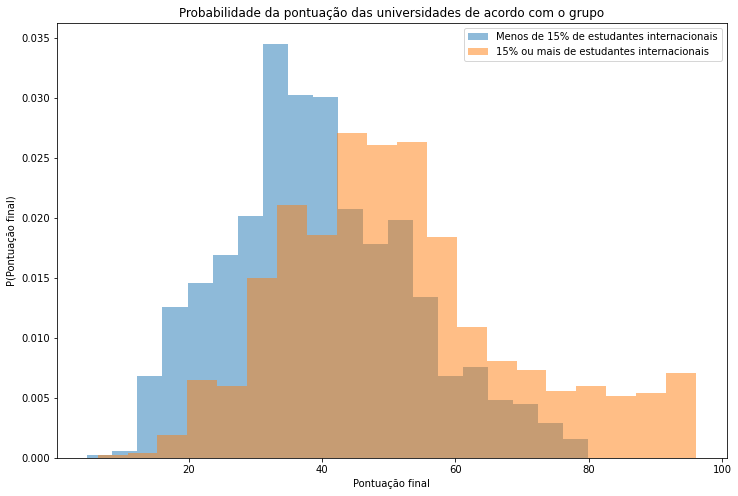

In [31]:
alpha_v = 0.5
plt.figure(figsize=(12,8))
plt.hist(gp_A['total_score'],density=True,alpha=alpha_v,label="Menos de 15% de estudantes internacionais",bins=20)
plt.hist(gp_B['total_score'],density=True,alpha=alpha_v,label="15% ou mais de estudantes internacionais",bins=20)
plt.ylabel("P(Pontuação final)")
plt.xlabel("Pontuação final")
plt.title("Probabilidade da pontuação das universidades de acordo com o grupo")
plt.legend()
print("Diferença entre a média das notas entre o grupo A e o grupo B: {}".format(mediaA - mediaB))

Parece que a distribuição de pontuação das universidades que tem pelo menos 15% de alunos internacionais está mais a direita do que as universidades com menos do que 15% de alunos internacionais.

### Permutando os grupos

In [32]:
dfTimesCopy = timesCompleto.copy()

In [33]:
#Criando a coluna do grupo dos dados
possui_mais_de_15 = [x >=15 for x in dfTimesCopy['international_students']]
dfTimesCopy['mais_de_15'] = possui_mais_de_15 
dfTimesCopy = dfTimesCopy.drop(labels=['world_rank','country','teaching','international',
                         'research','citations','income','num_students','student_staff_ratio',
                        'female_male_ratio','year'],axis=1)

In [34]:
def permuteECalculeDiferenca(df,group_col='mais_de_15',mean_col='total_score'):
    """
    Permuta uma dada coluna que contém True ou False e retorna a diferença entre as médias dos grupos True e False 
    dado uma coluna alvo. Não altera o df original
    df: O DataFrame
    group_col = O nome da coluna que contém apenas True ou False a ser permutada. default = mais_de_15
    mean_col = O nome da coluna alvo a ser comparado as médias entre os dois grupos. default = total_score
    return: A diferença da média entre o grupo que é False e o grupo True na coluna alvo
    """
    dfCopy = df.copy()
    col_perm_name = group_col+'_perm' 
    dfCopy[col_perm_name] = list(np.random.permutation(dfCopy[group_col].values))
    grupo_A = dfCopy[~dfCopy[col_perm_name]]
    grupo_B = dfCopy[dfCopy[col_perm_name]]
    media_A = grupo_A[mean_col].mean()
    media_B = grupo_B[mean_col].mean()
    return media_A - media_B

print(permuteECalculeDiferenca(dfTimesCopy))

-0.2782128203007517


In [35]:
def meansDiff(df, group_col='mais_de_15',mean_col='total_score'):
    """
    Retorna um array contendo 5000 diferenças entre as médias de dada coluna de acordo 
    com dois grupos diferentes.
    df: O DataFrame
    group_col: O nome da coluna em df que contém True ou False indicando tal linha pertencer ou não ao grupo. 
        default = mais_de_15 
    mean_col: O nome da coluna de onde a diferença entre as médias dos grupos será calculada.
        default = total_score
    """
    repeticoes = 5000
    diferencas = np.zeros(repeticoes)
    for i in range(repeticoes):
        diferencas[i] = permuteECalculeDiferenca(df, group_col, mean_col)
    return diferencas

In [36]:
diferencas = meansDiff(dfTimesCopy,group_col='mais_de_15',mean_col='total_score')
diff_percentil  = percentile(diferencas,2.5,97.5)

Média do grupo A - média do grupo B: -12.089758558563581
2.5%: -1.277218382396211, 97.5%: 1.327699589437808


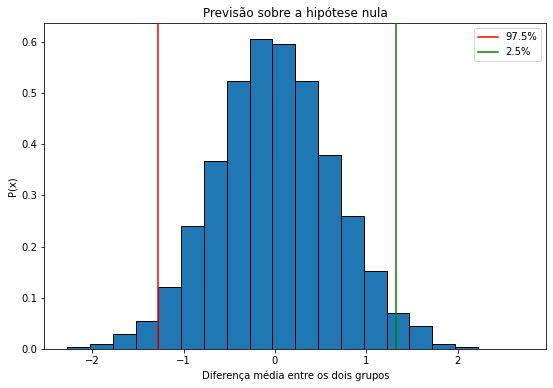

In [37]:
plt.figure(figsize=(9,6))
plt.hist(diferencas,density=True,bins=20, edgecolor='black', linewidth=1.0)
plt.ylabel("P(x)")
plt.xlabel("Diferença média entre os dois grupos")
plt.title("Previsão sobre a hipótese nula")
plt.axvline(x=diff_percentil[0],c='red',label='97.5%',zorder=5)
plt.axvline(x=diff_percentil[1],c='green',label='2.5%',zorder=5)
plt.legend()
print("Média do grupo A - média do grupo B: {}".format(mediaA - mediaB))
print("2.5%: {}, 97.5%: {}".format(diff_percentil[0],diff_percentil[1]))

Pode-se observar que, caso a pontuação final das universidades estivesse aleatóriamente distribuida para o grupo A (menos do 15% de alunos internacionais) e grupo B (pelo menos 15% de alunos internacionais), a diferença das médias dos grupos ficaria, com 95% de certeza, entre cerca de -1.31 e 1.28. Analisando a diferença da média real, que foi cerca de -12.08, temos um sinal de que a pontuação final das universidades não é aleatória com base no número de alunos internacionais.

# P.2: Qual o impacto de cada atributo suplementar na nota final da universidade?

<p>Além das notas de cada requisito usado no cálculo final da pontuação das universidades (teaching, international, research, citations e income), temos outros dados sobre as universidades: num_students, student_staff_ratio, international_students, female_male_ratio.</p>
    <p>Já foi realizada uma análise específica para a porcentagem de alunos internacionais na universidade, porém, queremos saber como todas essas informações adicionais ajudam a prever a nota da universidade.</p>

In [38]:
dfTimesCopy2 = timesCompleto.copy()

In [39]:
dfTimesCopy2 = dfTimesCopy2.drop(labels=['university_name','world_rank','country','teaching','international',
                         'research','citations','income','year'],axis=1)

In [40]:
#Tratando os dados
dfTimesCopy2['num_students']= pd.to_numeric(dfTimesCopy2['num_students'])
dfTimesCopy2['international_students'] = pd.to_numeric(dfTimesCopy2['international_students'])
dfTimesCopy2['female_male_ratio'] = pd.to_numeric(dfTimesCopy2['female_male_ratio'])
dfTimesCopy2['total_score'] = pd.to_numeric(dfTimesCopy2['total_score'])
dfTimesCopy2 = dfTimesCopy2.dropna()

In [41]:
dfTimesCopy2.head(3)

,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1,96.0,2243.0,6.9,27.0,33.0
2,95.5,11074.0,9.0,33.0,37.0
3,94.2,15596.0,7.8,22.0,42.0


### Comparando cada atributo suplementar com a nota final

Text(0.5, 1.0, ' Num. Estudantes X Pontuacao ')

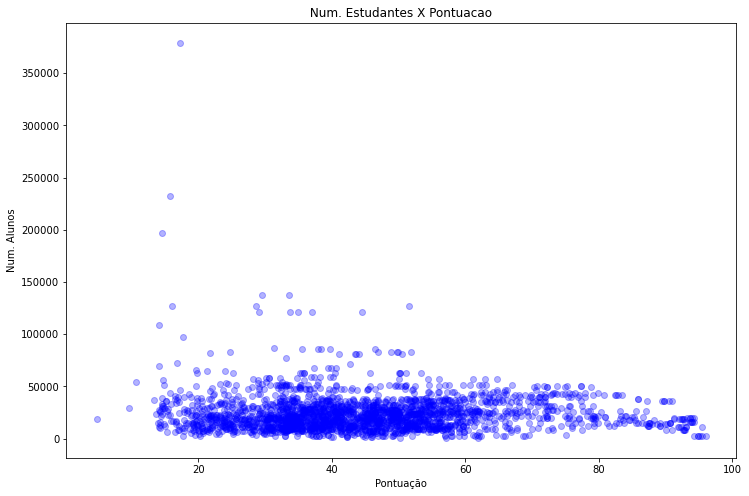

In [42]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['num_students'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("Num. Alunos")
plt.title(" Num. Estudantes X Pontuacao ")

Text(0.5, 1.0, '(Alunos/Funcionarios) X Pontuacao')

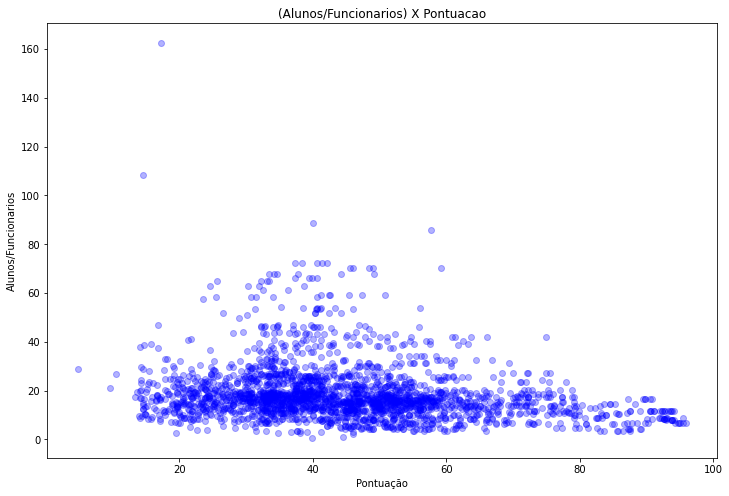

In [43]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['student_staff_ratio'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("Alunos/Funcionarios")
plt.title("(Alunos/Funcionarios) X Pontuacao")

Text(0.5, 1.0, '% Alunos internacionais X Pontuacao')

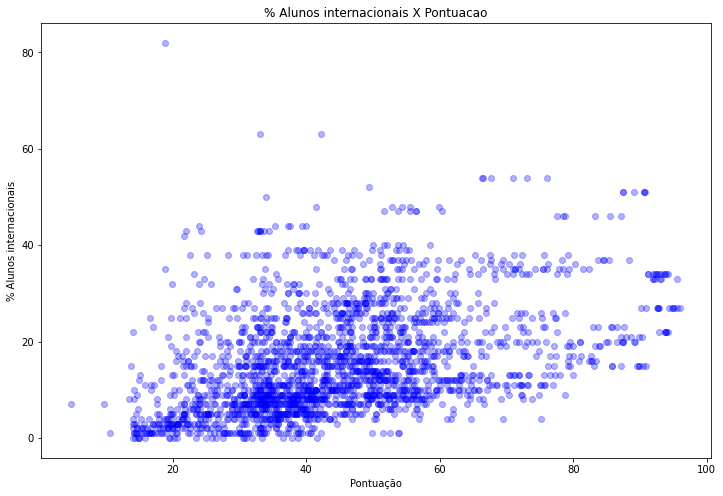

In [44]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['international_students'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("% Alunos internacionais")
plt.title("% Alunos internacionais X Pontuacao")

Text(0.5, 1.0, '% Alunos sexo feminino X Pontuacao')

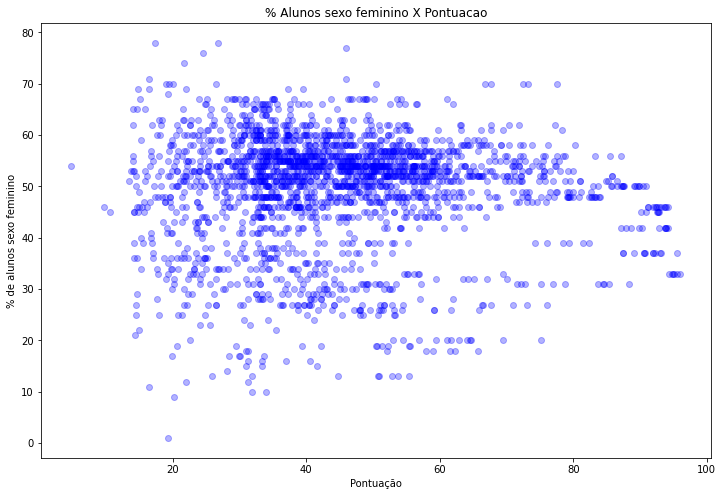

In [45]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['female_male_ratio'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("% de alunos sexo feminino")
plt.title("% Alunos sexo feminino X Pontuacao")

In [46]:
def gradients(theta, X, y):
    # x : matriz nxm
    # y : array nx1
    # theta : array mx1
    return -2* ((y-X@theta)*X.T).mean(axis=1)

In [47]:
def descent(theta0, X, y, learning_rate=0.005, tolerance=0.0000001):
    theta = theta0.copy()
    old_err_sq = np.inf
    for i in range(1000):
        #Deriva e atualiza
        grad = gradients(theta,X,y)
        theta_novo = theta - learning_rate*grad
        err_sq = ((X.dot(theta)-y)**2).mean()
        
        if np.abs(err_sq - old_err_sq)<=tolerance:
            break
        theta = theta_novo
        old_err_sq = err_sq
    return theta

In [48]:
def sst(y):
    result = np.zeros(len(y))
    for i in range(len(y)):
        result[i] = y[i]**2
    return result.sum()

In [49]:
def predict(X, theta):
    return X@theta

In [50]:
def sse(X, y, theta):
    previsto = predict(X,theta)
    return ((y - previsto)**2).sum()

In [51]:
def r2(X, y, theta):
    sst_ = sst(y)
    sse_ = sse(X,y,theta)
    return (1 - (sse_/sst_))**2

### Normalizando os Dados

In [56]:
#Normalizando os dados
y = dfTimesCopy2['total_score'].copy()
X = dfTimesCopy2[['num_students','student_staff_ratio','international_students','female_male_ratio']].copy()

x_mean = X.mean()
x_std = X.std(ddof=1)

y_mean = y.mean()
y_std = y.std(ddof=1)

X -= x_mean
X /= x_std
y -= y_mean
y /= y_std


# Acrescentamos uma coluna 0 correspondente ao intercepto (valor de y quando X=0)
X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values


In [57]:
descent([1,1,1,1,1],X,y)

array([ 0.00117819,  0.12807089, -0.19824969,  0.43673745, -0.04910016])

In [58]:
r2(X,y,descent([1,1,1,1,1],X,y))

0.050442486262524025

In [59]:
previsto = predict(X,descent([1,1,1,1,1],X,y))
diferenca = y - previsto

In [60]:
y = (y * y_std) + y_mean
previsto = (previsto * y_std) + y_mean

Text(0.5, 1.0, 'Pontuação prevista x Pontuação Real')

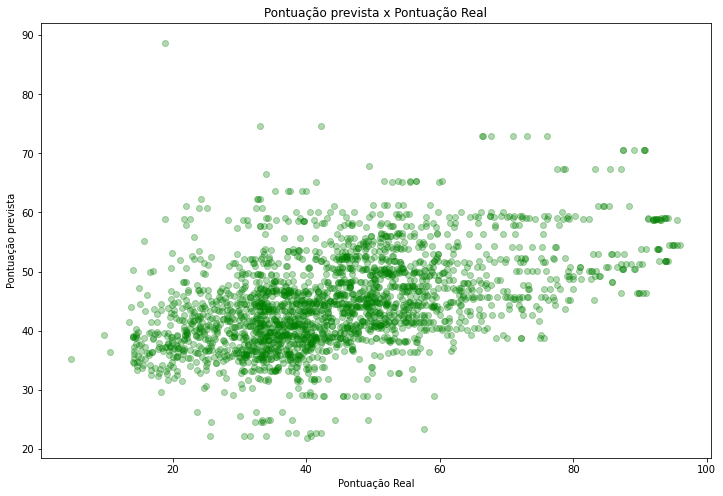

In [61]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(y=previsto,x=y,c='green',alpha=alpha_v,label="Pontuação prevista")
plt.xlabel("Pontuação Real")
plt.ylabel("Pontuação prevista")
plt.title("Pontuação prevista x Pontuação Real")

In [62]:
diferenca.std(ddof=1)

0.8805705897756086

In [63]:
diferenca.mean()

-0.0011781906582980736

In [64]:
np.percentile(diferenca,2.5)

-1.528154418728647

In [65]:
np.percentile(diferenca,97.5)

2.0493832678281163

Usando a regressão múltipla, pudemos obter pesos para cada atributo analisado na nota de uma universidade: 0.13471296 para num_students, -0.21330759 para student_staff_ratio,  0.43730969 para international_students, -0.04281806 para female_male_ratio além de um intercepto de 0.00106553. 

Com esses pesos, poderíamos inferir a influência que cada atributo tem na nota final, porém, o R^2 da regressão ficou em 0.053177928165288275, o que é um número bem baixo e, portanto, ruim.
<p>De acordo com as notas previstas pela regressão, obtivemos um erro (nota real - nota prevista) com desvio padrão de 14.48 e média -0.017. De acordo com o intervalo de confiança, com 95% de certeza, esse erro seria cerca de -24.74 a cerca de 33.84, número altos de erro para a pontuação.</p>
<p> Dessa forma, pode-se dizer que não é possível obter uma boa previsão sobre as notas reais utilizando apenas indicadores pré-calculo das notas.</p>

União das duas tabelas para saber o valor exato gasto em bilhões com educação.

Tratamento da junção das duas tabelas completo

...

Descobrir o total_score de cada pais usando a media total das universidades e usando cada ano especifico

Fazer um grafico scatter total_score 







In [66]:
timesCompleto[timesCompleto['world_rank']=='1'][['university_name', 'country', 'total_score','year']]

,university_name,country,total_score,year
0,Harvard University,United States of America,96.1,2011
200,California Institute of Technology,United States of America,94.8,2012
602,California Institute of Technology,United States of America,95.5,2013
1002,California Institute of Technology,United States of America,94.9,2014
1402,California Institute of Technology,United States of America,94.3,2015
1803,California Institute of Technology,United States of America,95.1,2016


In [67]:
timesTratado2012=timesCompleto[timesCompleto['year']==2012][['university_name', 'country', 'total_score','year']]

timesTratado2013=timesCompleto[timesCompleto['year']==2013][['university_name', 'country', 'total_score','year']]

timesTratado2014=timesCompleto[timesCompleto['year']==2014][['university_name', 'country', 'total_score','year']]

timesTratado2015=timesCompleto[timesCompleto['year']==2015][['university_name', 'country', 'total_score','year']]

timesTratado2016=timesCompleto[timesCompleto['year']==2016][['university_name', 'country', 'total_score','year']]

In [68]:
timesTratado2012['sum'] = timesTratado2012.groupby(['country'])['total_score'].transform('sum')
timesTratado2012['count'] = timesTratado2012.groupby(['country'])['total_score'].transform('count')
timesTratado2012['media'] = timesTratado2012['sum'] / timesTratado2012['count']
MediaNotaPais2012 = timesTratado2012.drop_duplicates(subset=['country'])[['country','media']].sort_values(by="country").copy()

timesTratado2013['sum'] = timesTratado2013.groupby(['country'])['total_score'].transform('sum')
timesTratado2013['count'] = timesTratado2013.groupby(['country'])['total_score'].transform('count')
timesTratado2013['media'] = timesTratado2013['sum'] / timesTratado2013['count']
MediaNotaPais2013 = timesTratado2013.drop_duplicates(subset=['country'])[['country','media']].sort_values(by="country").copy()

timesTratado2014['sum'] = timesTratado2014.groupby(['country'])['total_score'].transform('sum')
timesTratado2014['count'] = timesTratado2014.groupby(['country'])['total_score'].transform('count')
timesTratado2014['media'] = timesTratado2014['sum'] / timesTratado2014['count']
MediaNotaPais2014 = timesTratado2014.drop_duplicates(subset=['country'])[['country','media']].sort_values(by="country").copy()

timesTratado2015['sum'] = timesTratado2015.groupby(['country'])['total_score'].transform('sum')
timesTratado2015['count'] = timesTratado2015.groupby(['country'])['total_score'].transform('count')
timesTratado2015['media'] = timesTratado2015['sum'] / timesTratado2015['count']
MediaNotaPais2015= timesTratado2015.drop_duplicates(subset=['country'])[['country','media']].sort_values(by="country").copy()

timesTratado2016['sum'] = timesTratado2016.groupby(['country'])['total_score'].transform('sum')
timesTratado2016['count'] = timesTratado2016.groupby(['country'])['total_score'].transform('count')
timesTratado2016['media'] = timesTratado2016['sum'] / timesTratado2016['count']
MediaNotaPais2016 = timesTratado2016.drop_duplicates(subset=['country'])[['country','media']].sort_values(by="country").copy()

MediaNotaPais2012.rename(columns={ MediaNotaPais2012.columns[1]: "2012" }, inplace = True)
MediaNotaPais2013.rename(columns={ MediaNotaPais2013.columns[1]: "2013" }, inplace = True)
MediaNotaPais2014.rename(columns={ MediaNotaPais2014.columns[1]: "2014" }, inplace = True)
MediaNotaPais2015.rename(columns={ MediaNotaPais2015.columns[1]: "2015" }, inplace = True)
MediaNotaPais2016.rename(columns={ MediaNotaPais2016.columns[1]: "2016" }, inplace = True)

MediaNotaPais = MediaNotaPais2012.merge(MediaNotaPais2013,
        how = "inner",
        left_on = "country", right_on = "country")

MediaNotaPais = MediaNotaPais.merge(MediaNotaPais2014,
        how = "inner",
        left_on = "country", right_on = "country")

MediaNotaPais = MediaNotaPais.merge(MediaNotaPais2015,
        how = "inner",
        left_on = "country", right_on = "country")

MediaNotaPais = MediaNotaPais.merge(MediaNotaPais2016,
        how = "inner",
        left_on = "country", right_on = "country")

MediaNotaPais




,country,2012,2013,2014,2015,2016
0,Australia,38.057143,45.931579,43.552632,45.675000,43.735484
1,Austria,36.040000,40.458333,38.500000,41.720000,40.771429
2,Belgium,41.457143,47.571429,46.842857,46.985714,50.200000
3,Brazil,38.400000,45.350000,37.900000,39.600000,21.795588
4,Canada,47.405556,49.760526,47.031579,49.722222,45.124000
5,China,37.910000,45.744444,42.760000,43.590909,27.963514
6,Czech Republic,30.800000,35.300000,32.500000,36.500000,25.833333
7,Denmark,40.760000,46.300000,44.080000,44.540000,49.950000
8,Finland,34.460000,38.880000,37.370000,38.900000,38.955556
9,France,46.275000,47.654167,47.890909,48.172727,37.159259


In [69]:
investimentoEducacao.rename(columns={ investimentoEducacao.columns[0]: "country" }, inplace = True)


Final = MediaNotaPais.merge(investimentoEducacao,
        how = "inner",
        left_on = "country", right_on = "country")
 
Final = Final.fillna(0) 

Final.rename(columns={"2012": "Media da Universidades em 2012", "2013": "Media da Universidades em 2013", 
                      "2014": "Media da Universidades em 2014","2015": "Media da Universidades em 2015",
                      "2016": "Media da Universidades em 2016", }, inplace = True)

Final.rename(columns={"Result2012": "Investimento do pais em 2012", "Result2013": "Investimento do pais em 2013", 
                      "Result2014": "Investimento do pais em 2014","Result2015": "Investimento do pais em 2015",
                      "Result2016": "Investimento do pais em 2016", }, inplace = True)


In [70]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [71]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

In [72]:
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

def least_squares_fit(x, y):
    correlationxy = ss.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [73]:
def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

# P.3: Podemos prever a posição/pontuação média das universidades de um país dado o seu investimento em educação? 
## Regressão de cada ano de média de nota por investimento
### 2012

Text(0.5, 1.0, 'Comparativo investimento x nota 2012')

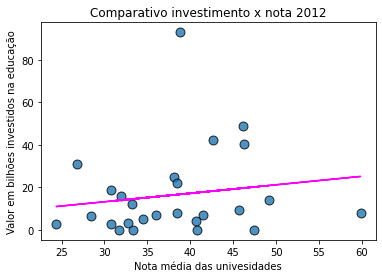

In [74]:
x = Final['Media da Universidades em 2012'].values
y = Final['Investimento do pais em 2012'].values
alpha, beta = least_squares_fit(x, y)
y1_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y1_model, color='magenta')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota 2012')

### 2013

Text(0.5, 1.0, 'Comparativo investimento x nota 2013')

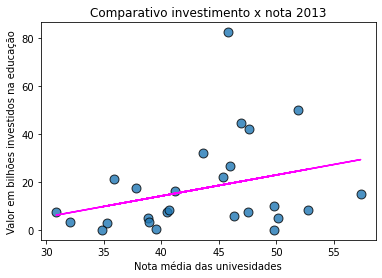

In [75]:
x = Final['Media da Universidades em 2013'].values
y = Final['Investimento do pais em 2013'].values
alpha, beta = least_squares_fit(x, y)
y2_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y2_model, color='magenta')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota 2013')

### 2014

Text(0.5, 1.0, 'Comparativo investimento x nota 2014')

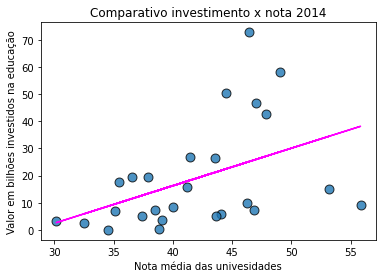

In [76]:
x = Final['Media da Universidades em 2014'].values
y = Final['Investimento do pais em 2014'].values
alpha, beta = least_squares_fit(x, y)
y3_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y3_model, color='magenta')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota 2014')

### 2015

Text(0.5, 1.0, 'Comparativo investimento x nota 2015')

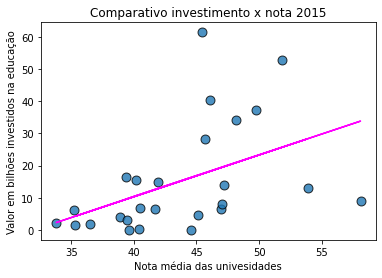

In [77]:
x = Final['Media da Universidades em 2015'].values
y = Final['Investimento do pais em 2015'].values
alpha, beta = least_squares_fit(x, y)
y4_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y4_model, color='magenta')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota 2015')

### 2016

Text(0.5, 1.0, 'Comparativo investimento x nota 2016')

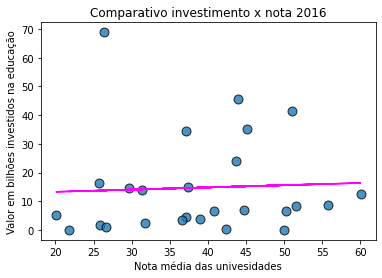

In [78]:
x = Final['Media da Universidades em 2016'].values
y = Final['Investimento do pais em 2016'].values
alpha, beta = least_squares_fit(x, y)
y5_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y5_model, color='magenta')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota 2016')

## Regressões de todos anos
### Média de nota por média de investimento

In [79]:
Final2012 = Final["Media da Universidades em 2012"]
Final2013 = Final["Media da Universidades em 2013"]
Final2014 = Final["Media da Universidades em 2014"]
Final2015 = Final["Media da Universidades em 2015"]
Final2016 = Final["Media da Universidades em 2016"]

FinalMedia = pd.concat([Final2012, Final2013, Final2014, Final2015, Final2016], axis = 0)

FinalMedia.to_frame()

Final2012 = Final["Investimento do pais em 2012"]
Final2013 = Final["Investimento do pais em 2013"]
Final2014 = Final["Investimento do pais em 2014"]
Final2015 = Final["Investimento do pais em 2015"]
Final2016 = Final["Investimento do pais em 2016"]

FinalInvestimento = pd.concat([Final2012, Final2013, Final2014, Final2015, Final2016], axis = 0)

FinalInvestimento.to_frame()

FinalTotal = pd.concat([FinalMedia, FinalInvestimento], axis = 1)

FinalTotal.rename(columns={FinalTotal.columns[0]: "Media", FinalTotal.columns[1]: "Investimento" }, inplace = True)


Text(0.5, 1.0, 'Comparativo investimento x nota de 2012-2016')

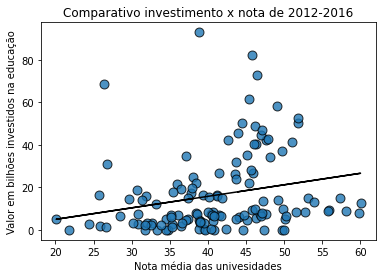

In [80]:
x = FinalTotal['Media'].values
y = FinalTotal['Investimento'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='black')
plt.xlabel('Nota média das univesidades')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota de 2012-2016')

In [81]:
print("Os dados a seguir são da regressão acima:")
e = error(alpha, beta, x, y)
e=e.mean()
print("Erro medio: ", e)
r2=r_squared(alpha, beta, x, y)
print("R2: ",r2)
corre=r_squared(alpha, beta, x, y) ** 0.5
print("Correlação:",corre)

Os dados a seguir são da regressão acima:
Erro medio:  -5.028456283840709e-15
R2:  0.054062958827557406
Correlação: 0.23251442713852705


Como o R2 está baixo, nosso modelo se ajusta pouco aos dados, além disso a correlação está perto de zero, logo poderiamos notar que a nota média das universidades e o valor do PIB gasto tem um relacionamento baixo, contudo isso não é suficiente, pois não temos o valor bruto recebido por faculdade e sim a média do país.

### Previsão de notas de universidade baseado em seu investimento

In [82]:
Ex = beta * 40 + alpha 

Ex

15.81136811616917

Como nosso modelo se ajusta pouco aos dados a previsão fica prejudicada.

## Regressão de todos anos de países europeus
### Média de nota por média de investimento

In [83]:
EUValues = Final[(Final["country"] == "Austria") | (Final["country"] == "Belgium") | (Final["country"] == "Czech Republic") | (Final["country"] == "Finland") | (Final["country"] == "France") |(Final["country"] == "Germany") | (Final["country"] == "Iceland") | (Final["country"] == "Italy") |(Final["country"] == "Netherlands") | (Final["country"] == "Norway") | (Final["country"] == "Poland") | (Final["country"] == "Portugal") | (Final["country"] == "Spain") | (Final["country"] == "Sweden") | (Final["country"] == "Switzerland") | (Final["country"] == "United Kingdom")]

EUValues.reset_index(drop=True, inplace=True)

EUValues

,country,Media da Universidades em 2012,Media da Universidades em 2013,Media da Universidades em 2014,Media da Universidades em 2015,Media da Universidades em 2016,Investimento do pais em 2012,Investimento do pais em 2013,Investimento do pais em 2014,Investimento do pais em 2015,Investimento do pais em 2016
0,Austria,36.040000,40.458333,38.500000,41.720000,40.771429,6.960229,7.311168,7.513934,6.490899,6.724667
1,Belgium,41.457143,47.571429,46.842857,46.985714,50.200000,6.946538,7.302998,7.485493,6.470096,6.660354
2,Czech Republic,30.800000,35.300000,32.500000,36.500000,25.833333,2.924008,2.751913,2.512306,1.880331,1.766449
3,Finland,34.460000,38.880000,37.370000,38.900000,38.955556,4.907792,4.883135,4.940950,3.985481,3.849727
4,France,46.275000,47.654167,47.890909,48.172727,37.159259,40.257378,42.166166,42.782486,34.134911,34.597998
5,Germany,42.615909,46.916000,44.450000,46.075000,51.008108,42.328139,44.792921,50.490962,40.274828,41.609976
6,Iceland,33.300000,39.500000,38.800000,40.400000,42.400000,0.176689,0.208436,0.230855,0.208669,0.247420
7,Italy,30.750000,35.885714,36.520000,39.400000,37.444118,18.783693,21.413153,19.432205,16.523093,15.006380
8,Netherlands,49.126923,57.323077,53.161538,53.884615,60.015385,14.262512,14.907700,15.146682,13.009504,12.536451
9,Norway,38.425000,40.625000,39.975000,40.475000,44.675000,8.152101,8.364185,8.472971,6.944428,7.007579


In [84]:
EUValues2012 = EUValues["Media da Universidades em 2012"]
EUValues2013 = EUValues["Media da Universidades em 2013"]
EUValues2014 = EUValues["Media da Universidades em 2014"]
EUValues2015 = EUValues["Media da Universidades em 2015"]
EUValues2016 = EUValues["Media da Universidades em 2016"]

EUValuesMedia = pd.concat([EUValues2012, EUValues2013, EUValues2014, EUValues2015, EUValues2016], axis = 0)

EUValuesMedia.to_frame()

EUValues2012 = EUValues["Investimento do pais em 2012"]
EUValues2013 = EUValues["Investimento do pais em 2013"]
EUValues2014 = EUValues["Investimento do pais em 2014"]
EUValues2015 = EUValues["Investimento do pais em 2015"]
EUValues2016 = EUValues["Investimento do pais em 2016"]

EUValuesInvestimento = pd.concat([EUValues2012, EUValues2013, EUValues2014, EUValues2015, EUValues2016], axis = 0)

EUValuesInvestimento.to_frame()

EUValuesTotal = pd.concat([EUValuesMedia, EUValuesInvestimento], axis = 1)

EUValuesTotal.rename(columns={EUValuesTotal.columns[0]: "Media", EUValuesTotal.columns[1]: "Investimento" }, inplace = True)


Text(0.5, 1.0, 'Comparativo investimento x nota de 2012-2016 das universidades européias')

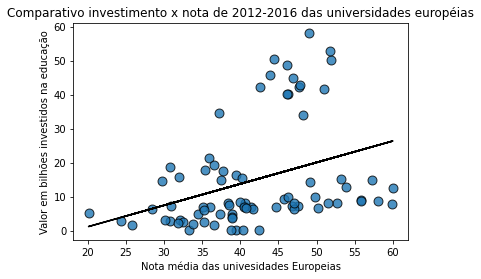

In [85]:
x = EUValuesTotal['Media'].values
y = EUValuesTotal['Investimento'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='black')
plt.xlabel('Nota média das univesidades Europeias')
plt.ylabel('Valor em bilhões investidos na educação')
plt.title('Comparativo investimento x nota de 2012-2016 das universidades européias')

In [86]:
print("Os dados a seguir são da regressão acima:")
e = error(alpha, beta, x, y)
e=e.mean()
print("Erro medio: ", e)
r2=r_squared(alpha, beta, x, y)
print("R2: ",r2)
corre=r_squared(alpha, beta, x, y) ** 0.5
print("Correlação:",corre)

Os dados a seguir são da regressão acima:
Erro medio:  3.552713678800501e-15
R2:  0.12307795313643477
Correlação: 0.3508246757804171


### Previsão de nota baseado em seu investimento em países europeus

In [87]:
Ex = beta * 40 + alpha 

Ex

13.837536254390745

# P.4Detectar se a proporção entre homens e mulheres teve uma tendencia geral ao longo do tempo


Hipotese Nula: Não houve uma tendencia geral em que a proporção de mulheres e homens se alterasse ao longo do tempo

Hipote Alternativa: Houve uma tendencia geral na proporção entre homens e mulheres 


In [88]:
timesCompleto.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243,6.9,27,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.5,11074,9.0,33,37,2011


In [89]:
Alunas = timesCompleto["female_male_ratio"]
Alunas = Alunas.to_frame()

Alunas.rename(columns={Alunas.columns[0]: "Porcentagem de alunas"}, inplace = True)

Alunos = 100 - Alunas

Alunos.rename(columns={Alunos.columns[0]: "Porcentagem de alunos"}, inplace = True)



In [90]:
ComQuantidadeAlunos = pd.concat([timesCompleto, Alunas, Alunos], axis=1)

ComQuantidadeAlunos.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,Porcentagem de alunas,Porcentagem de alunos
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011,NaN,NaN
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243,6.9,27,33,2011,33,67
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.5,11074,9.0,33,37,2011,37,63


## Porcentagem de alunas e alunos nos EUA entre 2011 e 2016

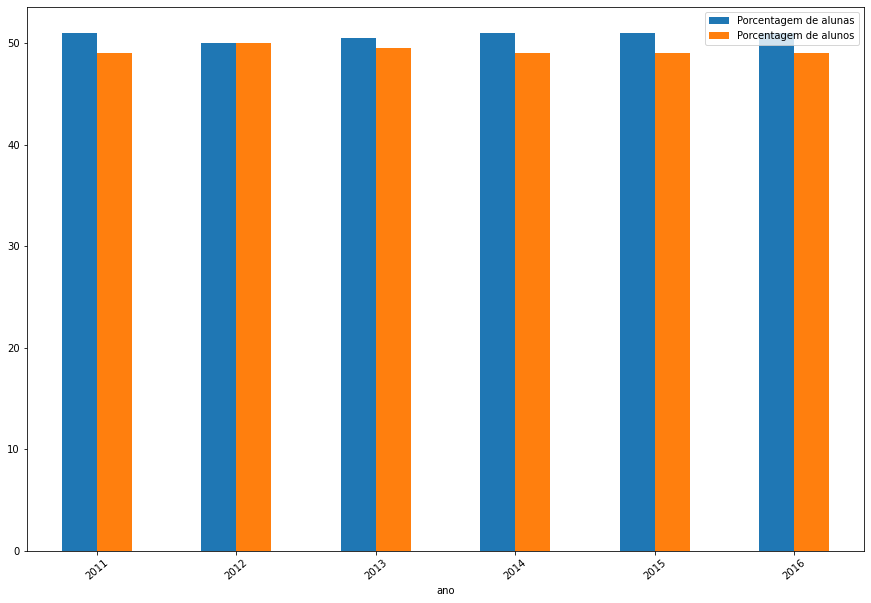

In [91]:
Us = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "United States of America"]

Us2011 = Us[Us["year"] == 2011]
UsAlunas2011 = Us2011['Porcentagem de alunas'].median()
UsAlunos2011 = Us2011['Porcentagem de alunos'].median()

Us2012 = Us[Us["year"] == 2012]
UsAlunas2012 = Us2012['Porcentagem de alunas'].median()
UsAlunos2012 = Us2012['Porcentagem de alunos'].median()

Us2013 = Us[Us["year"] == 2013]
UsAlunas2013 = Us2013['Porcentagem de alunas'].median()
UsAlunos2013 = Us2013['Porcentagem de alunos'].median()

Us2014 = Us[Us["year"] == 2014]
UsAlunas2014 = Us2014['Porcentagem de alunas'].median()
UsAlunos2014 = Us2014['Porcentagem de alunos'].median()

Us2015 = Us[Us["year"] == 2015]
UsAlunas2015 = Us2015['Porcentagem de alunas'].median()
UsAlunos2015 = Us2015['Porcentagem de alunos'].median()

Us2016 = Us[Us["year"] == 2016]
UsAlunas2016 = Us2016['Porcentagem de alunas'].median()
UsAlunos2016 = Us2016['Porcentagem de alunos'].median()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [UsAlunas2011, UsAlunas2012, UsAlunas2013, UsAlunas2014, UsAlunas2015, UsAlunas2016], 
     'Porcentagem de alunos' : [UsAlunos2011, UsAlunos2012, UsAlunos2013, UsAlunos2014, UsAlunos2015, UsAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos em Portugal entre 2011 e 2016

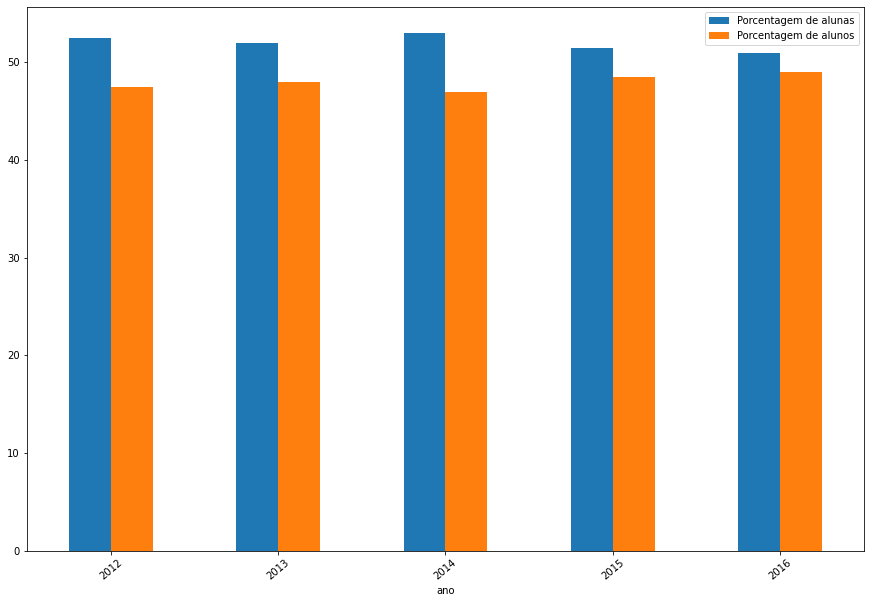

In [92]:
Pt = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Portugal"]

Pt2012 = Pt[Pt["year"] == 2012]
PtAlunas2012 = Pt2012['Porcentagem de alunas'].median()
PtAlunos2012 = Pt2012['Porcentagem de alunos'].median()

Pt2013 = Pt[Pt["year"] == 2013]
PtAlunas2013 = Pt2013['Porcentagem de alunas'].median()
PtAlunos2013 = Pt2013['Porcentagem de alunos'].median()

Pt2014 = Pt[Pt["year"] == 2014]
PtAlunas2014 = Pt2014['Porcentagem de alunas'].median()
PtAlunos2014 = Pt2014['Porcentagem de alunos'].median()

Pt2015 = Pt[Pt["year"] == 2015]
PtAlunas2015 = Pt2015['Porcentagem de alunas'].median()
PtAlunos2015 = Pt2015['Porcentagem de alunos'].median()

Pt2016 = Pt[Pt["year"] == 2016]
PtAlunas2016 = Pt2016['Porcentagem de alunas'].median()
PtAlunos2016 = Pt2016['Porcentagem de alunos'].median()

d = {'ano': [ 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [PtAlunas2012, PtAlunas2013, PtAlunas2014, PtAlunas2015, PtAlunas2016], 
     'Porcentagem de alunos' : [PtAlunos2012, PtAlunos2013, PtAlunos2014, PtAlunos2015, PtAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos no Brasil entre 2011 e 2016

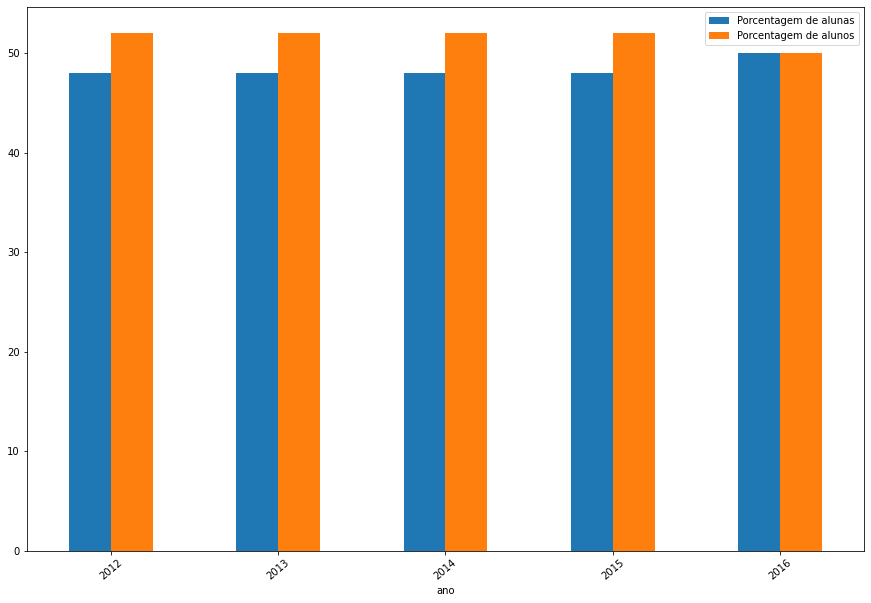

In [93]:
Br = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Brazil"]

Br2011 = Br[Br["year"] == 2011]
BrAlunas2011 = Br2011['Porcentagem de alunas'].median()
BrAlunos2011 = Br2011['Porcentagem de alunos'].median()

Br2012 = Br[Br["year"] == 2012]
BrAlunas2012 = Br2012['Porcentagem de alunas'].median()
BrAlunos2012 = Br2012['Porcentagem de alunos'].median()

Br2013 = Br[Br["year"] == 2013]
BrAlunas2013 = Br2013['Porcentagem de alunas'].median()
BrAlunos2013 = Br2013['Porcentagem de alunos'].median()

Br2014 = Br[Br["year"] == 2014]
BrAlunas2014 = Br2014['Porcentagem de alunas'].median()
BrAlunos2014 = Br2014['Porcentagem de alunos'].median()

Br2015 = Br[Br["year"] == 2015]
BrAlunas2015 = Br2015['Porcentagem de alunas'].median()
BrAlunos2015 = Br2015['Porcentagem de alunos'].median()

Br2016 = Br[Br["year"] == 2016]
BrAlunas2016 = Br2016['Porcentagem de alunas'].median()
BrAlunos2016 = Br2016['Porcentagem de alunos'].median()

d = {'ano': [2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [BrAlunas2012, BrAlunas2013, BrAlunas2014, BrAlunas2015, BrAlunas2016], 
     'Porcentagem de alunos' : [BrAlunos2012, BrAlunos2013, BrAlunos2014, BrAlunos2015, BrAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos no Canadá entre 2011 e 2016

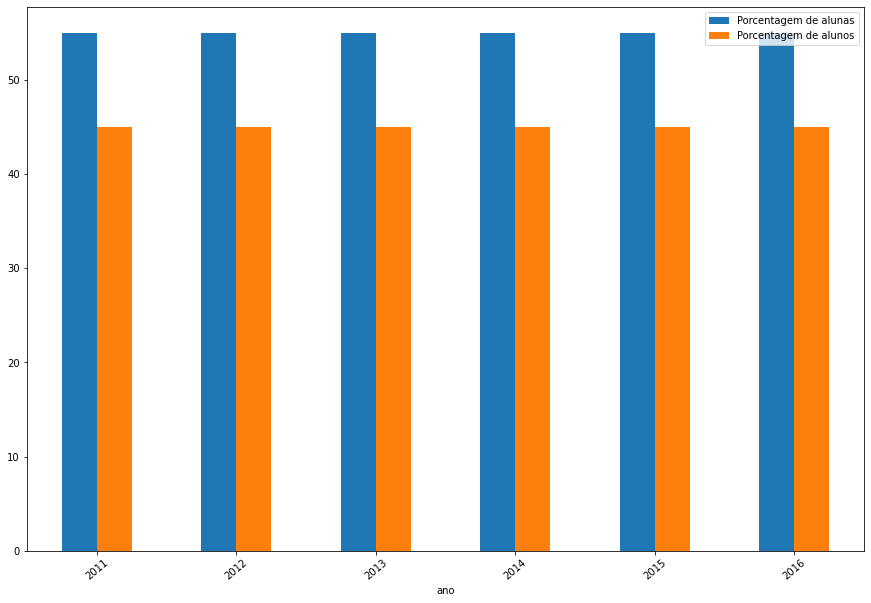

In [94]:
Ca = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Canada"]

Ca2011 = Ca[Ca["year"] == 2011]
CaAlunas2011 = Ca2011['Porcentagem de alunas'].median()
CaAlunos2011 = Ca2011['Porcentagem de alunos'].median()

Ca2012 = Ca[Ca["year"] == 2012]
CaAlunas2012 = Ca2012['Porcentagem de alunas'].median()
CaAlunos2012 = Ca2012['Porcentagem de alunos'].median()

Ca2013 = Ca[Ca["year"] == 2013]
CaAlunas2013 = Ca2013['Porcentagem de alunas'].median()
CaAlunos2013 = Ca2013['Porcentagem de alunos'].median()

Ca2014 = Ca[Ca["year"] == 2014]
CaAlunas2014 = Ca2014['Porcentagem de alunas'].median()
CaAlunos2014 = Ca2014['Porcentagem de alunos'].median()

Ca2015 = Ca[Ca["year"] == 2015]
CaAlunas2015 = Ca2015['Porcentagem de alunas'].median()
CaAlunos2015 = Ca2015['Porcentagem de alunos'].median()

Ca2016 = Ca[Ca["year"] == 2016]
CaAlunas2016 = Ca2016['Porcentagem de alunas'].median()
CaAlunos2016 = Ca2016['Porcentagem de alunos'].median()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [CaAlunas2011, CaAlunas2012, CaAlunas2013, CaAlunas2014, CaAlunas2015, CaAlunas2016], 
     'Porcentagem de alunos' : [CaAlunos2011, CaAlunos2012, CaAlunos2013, CaAlunos2014, CaAlunos2015, CaAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos na Alemanha entre 2011 e 2016

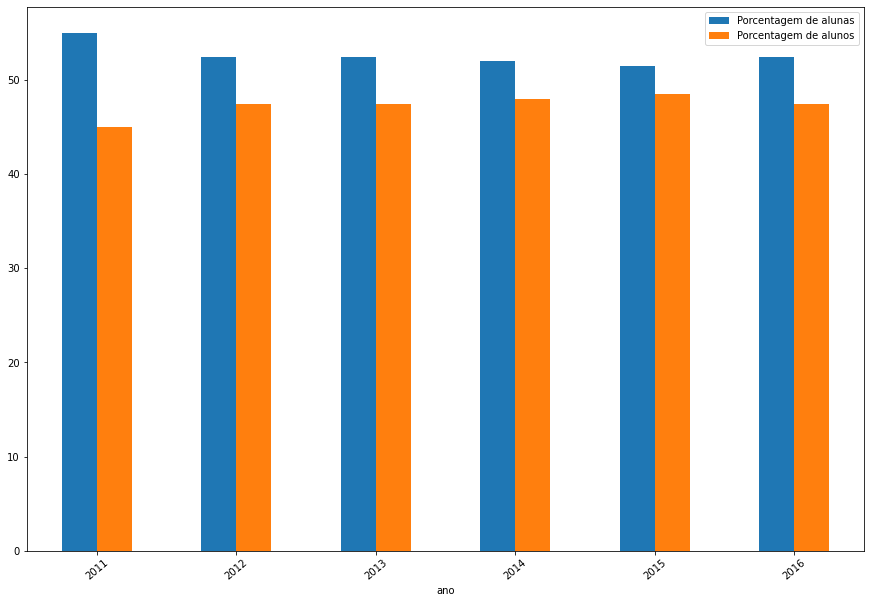

In [95]:
Ge = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Germany"]

Ge2011 = Ge[Ge["year"] == 2011]
GeAlunas2011 = Ge2011['Porcentagem de alunas'].median()
GeAlunos2011 = Ge2011['Porcentagem de alunos'].median()

Ge2012 = Ge[Ge["year"] == 2012]
GeAlunas2012 = Ge2012['Porcentagem de alunas'].median()
GeAlunos2012 = Ge2012['Porcentagem de alunos'].median()

Ge2013 = Ge[Ge["year"] == 2013]
GeAlunas2013 = Ge2013['Porcentagem de alunas'].median()
GeAlunos2013 = Ge2013['Porcentagem de alunos'].median()

Ge2014 = Ge[Ge["year"] == 2014]
GeAlunas2014 = Ge2014['Porcentagem de alunas'].median()
GeAlunos2014 = Ge2014['Porcentagem de alunos'].median()

Ge2015 = Ge[Ge["year"] == 2015]
GeAlunas2015 = Ge2015['Porcentagem de alunas'].median()
GeAlunos2015 = Ge2015['Porcentagem de alunos'].median()

Ge2016 = Ge[Ge["year"] == 2016]
GeAlunas2016 = Ge2016['Porcentagem de alunas'].median()
GeAlunos2016 = Ge2016['Porcentagem de alunos'].median()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [GeAlunas2011, GeAlunas2012, GeAlunas2013, GeAlunas2014, GeAlunas2015, GeAlunas2016], 
     'Porcentagem de alunos' : [GeAlunos2011, GeAlunos2012, GeAlunos2013, GeAlunos2014, GeAlunos2015, GeAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos na Austrália entre 2011 e 2016

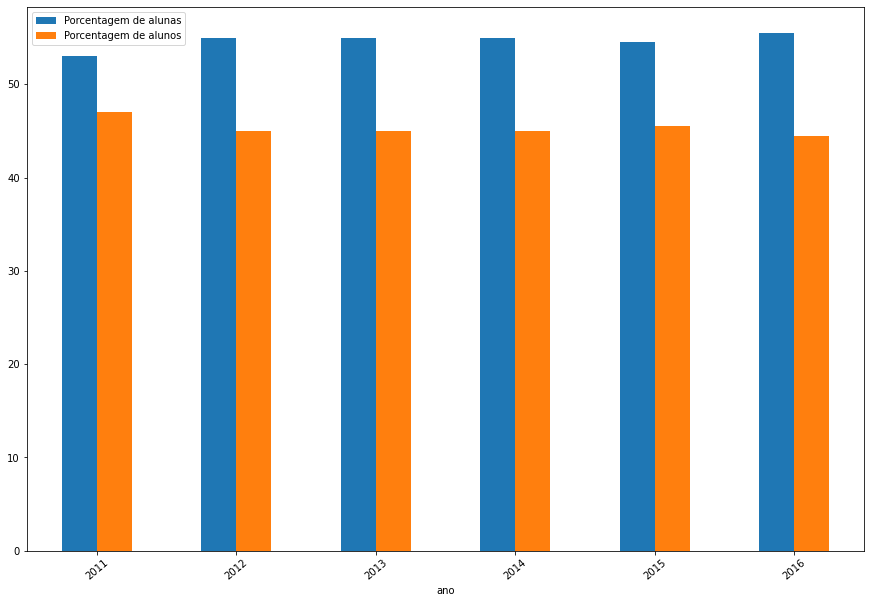

In [96]:
Au = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Australia"]

Au2011 = Au[Au["year"] == 2011]
AuAlunas2011 = Au2011['Porcentagem de alunas'].median()
AuAlunos2011 = Au2011['Porcentagem de alunos'].median()

Au2012 = Au[Au["year"] == 2012]
AuAlunas2012 = Au2012['Porcentagem de alunas'].median()
AuAlunos2012 = Au2012['Porcentagem de alunos'].median()

Au2013 = Au[Au["year"] == 2013]
AuAlunas2013 = Au2013['Porcentagem de alunas'].median()
AuAlunos2013 = Au2013['Porcentagem de alunos'].median()

Au2014 = Au[Au["year"] == 2014]
AuAlunas2014 = Au2014['Porcentagem de alunas'].median()
AuAlunos2014 = Au2014['Porcentagem de alunos'].median()

Au2015 = Au[Au["year"] == 2015]
AuAlunas2015 = Au2015['Porcentagem de alunas'].median()
AuAlunos2015 = Au2015['Porcentagem de alunos'].median()

Au2016 = Au[Au["year"] == 2016]
AuAlunas2016 = Au2016['Porcentagem de alunas'].median()
AuAlunos2016 = Au2016['Porcentagem de alunos'].median()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [AuAlunas2011, AuAlunas2012, AuAlunas2013, AuAlunas2014, AuAlunas2015, AuAlunas2016], 
     'Porcentagem de alunos' : [AuAlunos2011, AuAlunos2012, AuAlunos2013, AuAlunos2014, AuAlunos2015, AuAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos no Japão entre 2011 e 2016

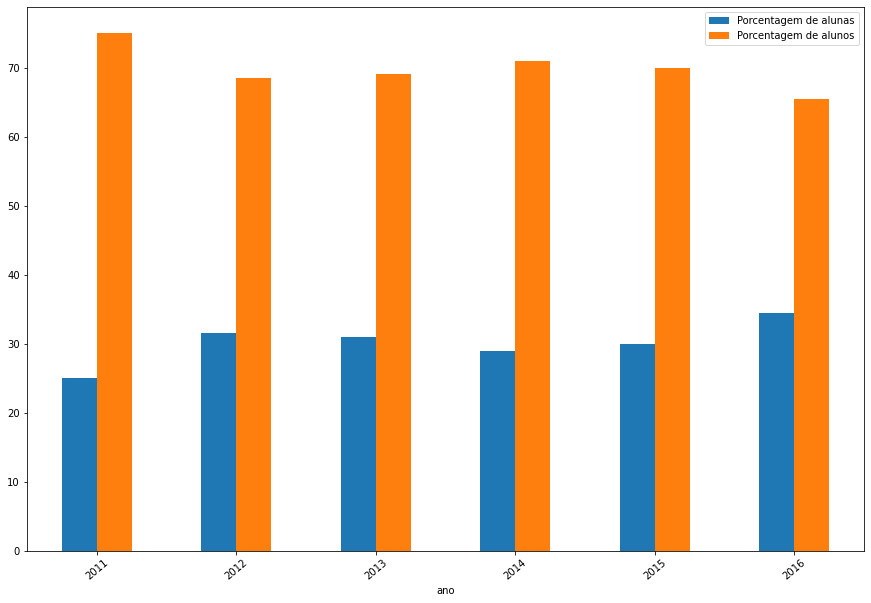

In [97]:
Jp = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "Japan"]

Jp2011 = Jp[Jp["year"] == 2011]
JpAlunas2011 = Jp2011['Porcentagem de alunas'].median()
JpAlunos2011 = Jp2011['Porcentagem de alunos'].median()

Jp2012 = Jp[Jp["year"] == 2012]
JpAlunas2012 = Jp2012['Porcentagem de alunas'].median()
JpAlunos2012 = Jp2012['Porcentagem de alunos'].median()

Jp2013 = Jp[Jp["year"] == 2013]
JpAlunas2013 = Jp2013['Porcentagem de alunas'].median()
JpAlunos2013 = Jp2013['Porcentagem de alunos'].median()

Jp2014 = Jp[Jp["year"] == 2014]
JpAlunas2014 = Jp2014['Porcentagem de alunas'].median()
JpAlunos2014 = Jp2014['Porcentagem de alunos'].median()

Jp2015 = Jp[Jp["year"] == 2015]
JpAlunas2015 = Jp2015['Porcentagem de alunas'].median()
JpAlunos2015 = Jp2015['Porcentagem de alunos'].median()

Jp2016 = Jp[Jp["year"] == 2016]
JpAlunas2016 = Jp2016['Porcentagem de alunas'].median()
JpAlunos2016 = Jp2016['Porcentagem de alunos'].median()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [JpAlunas2011, JpAlunas2012, JpAlunas2013, JpAlunas2014, JpAlunas2015, JpAlunas2016], 
     'Porcentagem de alunos' : [JpAlunos2011, JpAlunos2012, JpAlunos2013, JpAlunos2014, JpAlunos2015, JpAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

## Porcentagem de alunas e alunos na China entre 2011 e 2016

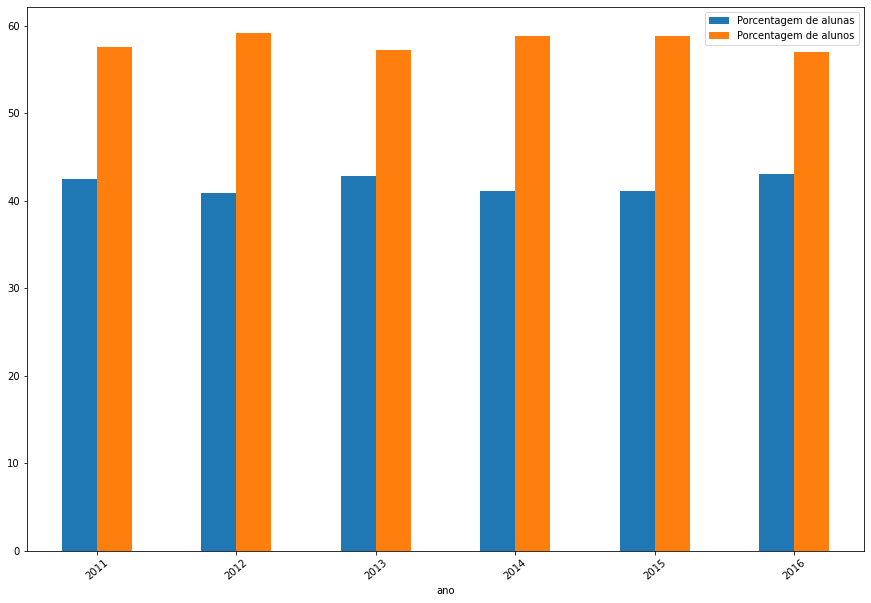

In [98]:
Ch = ComQuantidadeAlunos[ComQuantidadeAlunos["country"] == "China"]

Ch2011 = Ch[Ch["year"] == 2011]
ChAlunas2011 = Ch2011['Porcentagem de alunas'].mean()
ChAlunos2011 = Ch2011['Porcentagem de alunos'].mean()

Ch2012 = Ch[Ch["year"] == 2012]
ChAlunas2012 = Ch2012['Porcentagem de alunas'].mean()
ChAlunos2012 = Ch2012['Porcentagem de alunos'].mean()

Ch2013 = Ch[Ch["year"] == 2013]
ChAlunas2013 = Ch2013['Porcentagem de alunas'].mean()
ChAlunos2013 = Ch2013['Porcentagem de alunos'].mean()

Ch2014 = Ch[Ch["year"] == 2014]
ChAlunas2014 = Ch2014['Porcentagem de alunas'].mean()
ChAlunos2014 = Ch2014['Porcentagem de alunos'].mean()

Ch2015 = Ch[Ch["year"] == 2015]
ChAlunas2015 = Ch2015['Porcentagem de alunas'].mean()
ChAlunos2015 = Ch2015['Porcentagem de alunos'].mean()

Ch2016 = Ch[Ch["year"] == 2016]
ChAlunas2016 = Ch2016['Porcentagem de alunas'].mean()
ChAlunos2016 = Ch2016['Porcentagem de alunos'].mean()

d = {'ano': [2011, 2012, 2013, 2014, 2015, 2016], 
     'Porcentagem de alunas': [ChAlunas2011, ChAlunas2012, ChAlunas2013, ChAlunas2014, ChAlunas2015, ChAlunas2016], 
     'Porcentagem de alunos' : [ChAlunos2011, ChAlunos2012, ChAlunos2013, ChAlunos2014, ChAlunos2015, ChAlunos2016]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'ano', y = ['Porcentagem de alunas', 'Porcentagem de alunos'], rot = 40, figsize=(15,10))

Em todos os gráficos não foi possivel observar uma tendência nas universidades houve um aumento de mais mulheres do que homens ou mais homens do que mulheres nos anos recentes de 2011 a 2016, contudo se houvesse dados de mais anos uma tendência poderia ser observada.

# P:4.1: Universidades com pelo menos 50% de mulheres tem mais pontuação do que as que tem menos do que 50% de mulheres?

In [99]:
MaisMulheres = ComQuantidadeAlunos[ComQuantidadeAlunos['Porcentagem de alunas'] >= 50]
MenosMulheres = ComQuantidadeAlunos[ComQuantidadeAlunos['Porcentagem de alunas'] < 50]

MaisMulheres = MaisMulheres['total_score'] 
MenosMulheres = MenosMulheres['total_score'] 


Mais = MaisMulheres.mean()
Menos = MenosMulheres.mean()

In [100]:
Us = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'United States of America']
MaisMulheresUs = Us[Us['Porcentagem de alunas'] >= 50]
MenosMulheresUs = Us[Us['Porcentagem de alunas'] < 50]
MaisMulheresUs = MaisMulheresUs['total_score'] 
MenosMulheresUs = MenosMulheresUs['total_score'] 
MaisUs = MaisMulheresUs.mean()
MenosUs = MenosMulheresUs.mean()

In [101]:
Pt = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Portugal']
MaisMulheresPt = Pt[Pt['Porcentagem de alunas'] >= 50]
MenosMulheresPt = Pt[Pt['Porcentagem de alunas'] < 50]
MaisMulheresPt = MaisMulheresPt['total_score'] 
MenosMulheresPt = MenosMulheresPt['total_score'] 
MaisPt = MaisMulheresPt.mean()
MenosPt = MenosMulheresPt.mean()

In [102]:
Br = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Brazil']
MaisMulheresBr = Br[Br['Porcentagem de alunas'] >= 50]
MenosMulheresBr = Br[Br['Porcentagem de alunas'] < 50]
MaisMulheresBr = MaisMulheresBr['total_score'] 
MenosMulheresBr = MenosMulheresBr['total_score'] 
MaisBr = MaisMulheresBr.mean()
MenosBr = MenosMulheresBr.mean()

In [103]:
Ca = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Canada']
MaisMulheresCa = Ca[Ca['Porcentagem de alunas'] >= 50]
MenosMulheresCa = Ca[Ca['Porcentagem de alunas'] < 50]
MaisMulheresCa = MaisMulheresCa['total_score'] 
MenosMulheresCa = MenosMulheresCa['total_score'] 
MaisCa = MaisMulheresCa.mean()
MenosCa = MenosMulheresCa.mean()


In [104]:
Ge = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Germany']
MaisMulheresGe = Ge[Ge['Porcentagem de alunas'] >= 50]
MenosMulheresGe = Ge[Ge['Porcentagem de alunas'] < 50]
MaisMulheresGe = MaisMulheresGe['total_score'] 
MenosMulheresGe = MenosMulheresGe['total_score'] 
MaisGe = MaisMulheresGe.mean()
MenosGe = MenosMulheresGe.mean()

In [105]:
Au = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Australia']
MaisMulheresAu = Au[Au['Porcentagem de alunas'] >= 50]
MenosMulheresAu = Au[Au['Porcentagem de alunas'] < 50]
MaisMulheresAu = MaisMulheresAu['total_score'] 
MenosMulheresAu = MenosMulheresAu['total_score'] 
MaisAu = MaisMulheresAu.mean()
MenosAu = MenosMulheresAu.mean()

In [106]:
Jp = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'Japan']
MaisMulheresJp = Jp[Jp['Porcentagem de alunas'] >= 50]
MenosMulheresJp = Jp[Jp['Porcentagem de alunas'] < 50]
MaisMulheresJp = MaisMulheresJp['total_score'] 
MenosMulheresJp = MenosMulheresJp['total_score'] 
MaisJp = MaisMulheresJp.mean()
MenosJp = MenosMulheresJp.mean()

In [107]:
Ch = ComQuantidadeAlunos[ComQuantidadeAlunos['country'] == 'China']
MaisMulheresCh = Ch[Ch['Porcentagem de alunas'] >= 50]
MenosMulheresCh = Ch[Ch['Porcentagem de alunas'] < 50]
MaisMulheresCh = MaisMulheresCh['total_score'] 
MenosMulheresCh = MenosMulheresCh['total_score'] 
MaisCh = MaisMulheresCh.mean()
MenosCh = MenosMulheresCh.mean()

## Média das universidades com mais ou menos mulheres

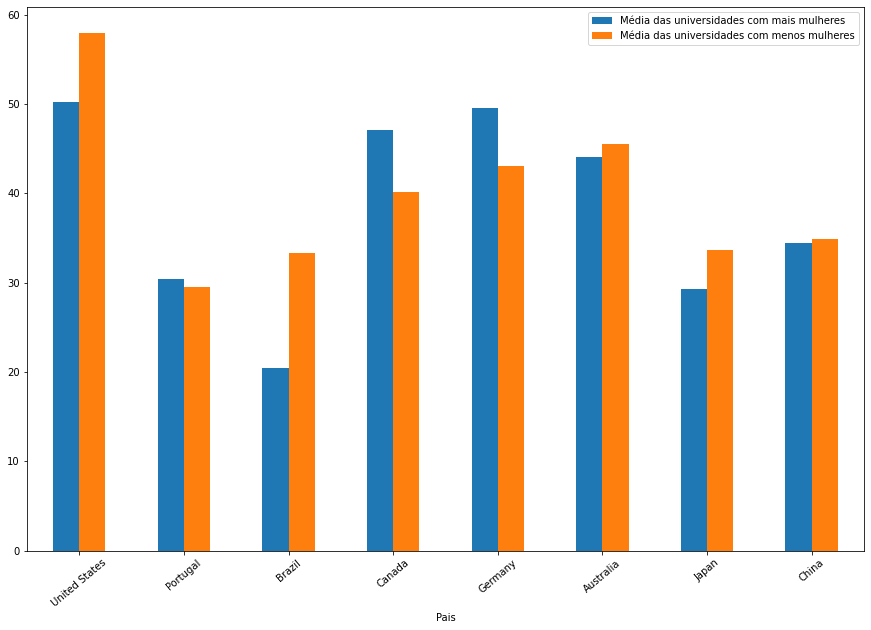

In [108]:
d = {'Pais': ['United States', 'Portugal', 'Brazil', 'Canada', 'Germany', 'Australia','Japan','China'], 
     'Média das universidades com mais mulheres': [MaisUs, MaisPt, MaisBr, MaisCa, MaisGe, MaisAu, MaisJp, MaisCh], 
     'Média das universidades com menos mulheres' : [MenosUs, MenosPt, MenosBr, MenosCa, MenosGe, MenosAu, MenosJp, MenosCh]}

df = pd.DataFrame(data=d)

df


df.plot.bar(x = 'Pais', y = ['Média das universidades com mais mulheres', 'Média das universidades com menos mulheres'], rot = 40, figsize=(15,10))

Não foi possivel observar em que o fato de ter mais de %50 de mulheres afete significativamente o aumento da pontuação da nota de universidade de um país.